In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def scaling(data):
    data = (data - data.mean())/data.std()
    return data

In [3]:
def linear_regression(X,Y,LR,epochs):
    m = len(X)
    w = np.zeros(X.shape[1])
    b = 0
    costfunction = []
    for i in range(epochs):
        y_hat = np.dot(w, X.T) + b
        error =round(y_hat - Y,8)
        costfn = np.sum(round((error**2)/(2*m),5))
        w_gradient =np.dot(X.T, error)/m           
        b_gradient = np.sum(error/m) 
        w = w - LR*w_gradient
        b = b - LR*b_gradient
        costfunction.append((costfn))

        if i%100 == 0:
            print(f"costfunction at {i}:",round(costfn,5))
    
    plt.plot(range(epochs),costfunction)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.show()
    
    return w,b,costfn


In [4]:
def checkaccuracy(w, b, X, Y):
    erroravg = 0
    m = len(X)
    for i, row in X.iterrows():
        y_hat = np.dot(w, row) + b
        erroravg += np.absolute(round(y_hat - Y[i], 5))
    avg_error = erroravg * 100 / m
    accuracy = 100 - avg_error
    return avg_error, accuracy

costfunction at 0: 0.49951
costfunction at 100: 0.12815
costfunction at 200: 0.12365
costfunction at 300: 0.12121
costfunction at 400: 0.12005
costfunction at 500: 0.11953
costfunction at 600: 0.11926
costfunction at 700: 0.11899
costfunction at 800: 0.11889
costfunction at 900: 0.11875


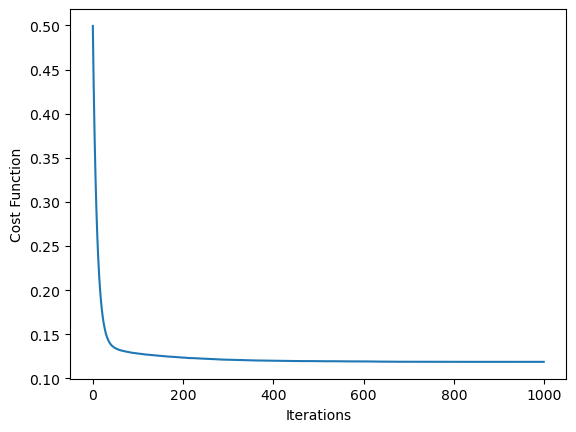

train error : 30.070451198630142 ||  test accuracy : 69.92954880136986
test error : 29.85978424657536 ||  test accuracy : 70.14021575342464


In [5]:
train = pd.read_csv("train.csv")
Y_train = train["SalePrice"]
X_train = train.drop(["SalePrice"],axis = 1)
X_train = scaling(X_train)
Y_train = scaling(Y_train)

test = pd.read_csv("test.csv")
Y_test = test["SalePrice"]
X_test= test.drop(["SalePrice"],axis = 1)
X_test = scaling(X_test)
Y_test = scaling(Y_test)

w,b,costfn = linear_regression(X_train,Y_train,0.01,1000)
train_error,train_accuracy = checkaccuracy(w,b,X_train,Y_train)
test_error,test_accuracy = checkaccuracy(w,b,X_test,Y_test)
print(f"train error : {train_error} ||  test accuracy : {train_accuracy}")
print(f"test error : {test_error} ||  test accuracy : {test_accuracy}")

